# Paso 1.

## Análisis exploratorio de datos

In [1]:
# Cargar las librerías necesarias.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Leer y corregir los archivos en caso de ser necesario.
taxi_data = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')

print(taxi_data, '\n\n\n', dropoff_data)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns] 


    dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91           

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# Identificamos los 10 principales barrios en términos de promedio de finalización de viajes

top_10_neighborhoods = dropoff_data.sort_values(by = 'average_trips', ascending = False).head(10)

top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


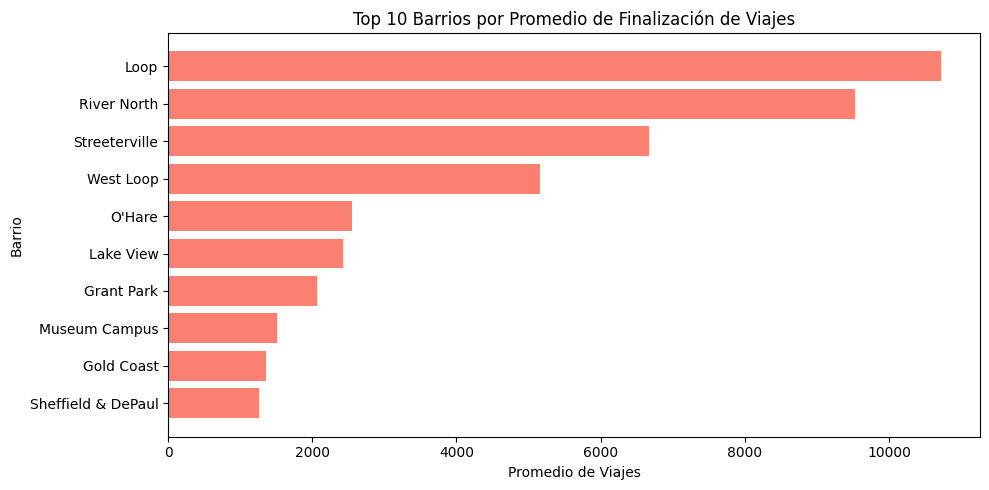

In [6]:
# Gráfico de los 10 principales barrios por número de finalizaciones

plt.figure(figsize=(10, 5))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='salmon')
plt.title('Top 10 Barrios por Promedio de Finalización de Viajes')
plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [7]:
# Identificamos las 10 principales compañias de taxis por numero de viajes

top_10_taxi_company = taxi_data.sort_values(by = 'trips_amount', ascending = False).head(10)

top_10_taxi_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


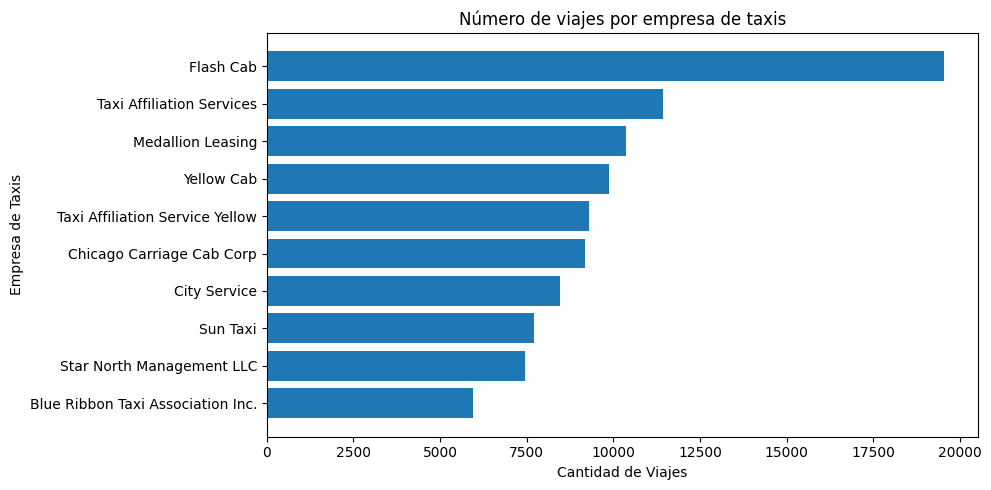

In [8]:
# Gráfico de empresas de taxis y número de viajes

plt.figure(figsize = (10, 5))
plt.barh(top_10_taxi_company['company_name'], top_10_taxi_company['trips_amount'])
plt.title('Número de viajes por empresa de taxis')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Empresa de Taxis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Conclusiones:**

 - Como se puede observar en el gráfico 'Número de viajes por empresa de taxi'Para las empresas de taxis: La diferencia en el número de viajes puede indicar variabilidad en la demanda de servicios, posiblemente relacionada con la popularidad o cobertura de las empresas.
 
 - Por otra parte, como se observa en el gráfico 'Top 10 Barrios por Promedio de Finalización de Viajes', lLos barrios con mayor número de finalizaciones podrían ser buenos candidatos para la expansión de servicios o promociones debido a la alta demanda. Además, estos datos pueden guiar estrategias de asignación de recursos para optimizar el servicio.

# Paso 2.

## Prueba de hipótesis

In [9]:
# Leer y corregir los archivos en caso de ser necesario.
trips_data = pd.read_csv('/datasets/project_sql_result_07.csv')

trips_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [10]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# Convertir 'start_ts' a formato de fecha
trips_data['start_ts'] = pd.to_datetime(trips_data['start_ts'], errors='coerce')

# Obtener los días de la semana 
trips_data['day_of_week'] = trips_data['start_ts'].dt.day_name()

trips_data

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [12]:
# Filtramos los datos para los sábados lluviosos y los sábados despejados
rainy_saturdays = trips_data[trips_data['weather_conditions'] == "Bad"] 
clear_saturdays = trips_data[trips_data['weather_conditions'] == "Good"]

# Extraemos las duraciones de los dos grupos
durations_rainy = rainy_saturdays['duration_seconds']
durations_clear = clear_saturdays['duration_seconds']

In [13]:
# Comprobamos homogeneidad de varianza con la prueba de Levene
levene_test = st.levene(durations_rainy, durations_clear)
print(f"Prueba de Levene para homogeneidad de varianzas: p-value = {levene_test.pvalue:.4f}")
    
if levene_test.pvalue > 0.05:
    # Prueba t de Student para muestras independientes
    t_stat, p_value = st.ttest_ind(durations_rainy, durations_clear)
    print(f"Prueba t de Student entre sábados lluviosos y despejados: p-value = {p_value:.4f}")
else:
    # Prueba t de Welch si no hay homogeneidad de varianza
    t_stat, p_value = st.ttest_ind(durations_rainy, durations_clear, equal_var=False)
    print(f"Prueba t de Welch entre sábados lluviosos y despejados: p-value = {p_value:.4f}")

Prueba de Levene para homogeneidad de varianzas: p-value = 0.5332
Prueba t de Student entre sábados lluviosos y despejados: p-value = 0.0000


In [14]:
# Establecer el nivel de significancia comúnmente utilizado
alpha = 0.05

# Realizamos la prueba t de muestras independientes
t_stat, p_value = st.ttest_ind(durations_rainy, durations_clear, equal_var = True)

# Resultados de la prueba
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Realizar la prueba t de dos muestras
results = st.ttest_ind(durations_rainy, durations_clear, equal_var = False)

# Comarar el valor p con el umbral
if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')

Estadístico t: 6.946177714041499
Valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula.


**Conclusión:**
    
    Según los resultados obtenidos mediante la prueba de hipótesis, después de validar las varianzas mediante el método Levene, ya que se rechaza la hipótesis nula, significa que existe una diferencia significativa en la duración de los viajes cuando hay un clima lluvioso de cuando el clima es bueno.